<a href="https://colab.research.google.com/github/Anurag-Tendulkar/Addressing-Class-Imbalance-in-Stroke-Prediction-using-Machine-Learning/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim - To develop a predictive model to successively identify strokes in the population.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# please import the dataset in colab before executing the code
dataset = pd.read_csv('stroke data.csv')
dataset.head()

,id,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
0,1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,NaN,0
1,2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
2,3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,NaN,0
3,4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
4,5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,NaN,0


In [ ]:
# Analyzing the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43400 non-null  int64  
 1   gender          43400 non-null  object 
 2   age             43400 non-null  float64
 3   married         43400 non-null  object 
 4   hypertension    43400 non-null  int64  
 5   heart_disease   43400 non-null  int64  
 6   occupation      43400 non-null  object 
 7   residence       43400 non-null  object 
 8   metric_1        43400 non-null  float64
 9   metric_2        41938 non-null  float64
 10  metric_3        43400 non-null  int64  
 11  metric_4        43400 non-null  float64
 12  metric_5        43400 non-null  float64
 13  smoking_status  30108 non-null  object 
 14  stroke          43400 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 5.0+ MB


In [ ]:
# get the unique values of columns
print(dataset['gender'].unique())
print(dataset['married'].unique())
print(dataset['occupation'].unique())
print(dataset['residence'].unique())
print(dataset['smoking_status'].unique())

['Male' 'Female' 'Other']
['No' 'Yes']
['A' 'B' 'C' 'D' 'E']
['Rural' 'Urban']
[nan 'never smoked' 'formerly smoked' 'smokes']


In [ ]:
# convert the categorical nominal variables to numerical data
gender_converted_variable=pd.get_dummies(dataset['gender']).drop('Other', axis=1)
married_converted_variable=pd.get_dummies(dataset['married'],drop_first=True,prefix='married_status')
occupation_converted_variable=pd.get_dummies(dataset['occupation'],drop_first=True,prefix='occupation')
residence_converted_variable=pd.get_dummies(dataset['residence'],drop_first=True,prefix='residence')

dataset=pd.concat([dataset,gender_converted_variable],axis=1)
dataset=pd.concat([dataset,married_converted_variable],axis=1)
dataset=pd.concat([dataset,occupation_converted_variable],axis=1)
dataset=pd.concat([dataset,residence_converted_variable],axis=1)

dataset.pop('gender')
dataset.pop('married')
dataset.pop('occupation')
dataset.pop('residence')
dataset.pop('id')
dataset.head()

,age,hypertension,heart_disease,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke,Female,Male,married_status_Yes,occupation_B,occupation_C,occupation_D,occupation_E,residence_Urban
0,3.0,0,0,95.12,18.0,1,99.35,95.12,NaN,0,0,1,0,0,0,0,0,0
1,58.0,1,0,87.96,39.2,1,99.70,87.96,never smoked,0,0,1,1,1,0,0,0,1
2,8.0,0,0,110.89,17.6,0,96.35,110.89,NaN,0,1,0,0,1,0,0,0,1
3,70.0,0,0,69.04,35.9,0,95.52,69.04,formerly smoked,0,1,0,1,1,0,0,0,0
4,14.0,0,0,161.28,19.1,1,95.10,161.28,NaN,0,0,1,0,0,1,0,0,0


In [ ]:
# convert categorical ordinal variable into numeric data
smoking_converted_variable=dataset['smoking_status'].map({'never smoked':0, 'formerly smoked':0.5, 'smokes':1})
dataset.pop('smoking_status')
dataset=pd.concat([dataset,smoking_converted_variable],axis=1)
print(dataset['smoking_status'].unique())

[nan 0.  0.5 1. ]


In [ ]:
# look at data dypes of variables. convert binary variables into object type to avoid standardizing them
dataset.dtypes

age                   float64
hypertension            int64
heart_disease           int64
metric_1              float64
metric_2              float64
metric_3                int64
metric_4              float64
metric_5              float64
stroke                  int64
Female                  uint8
Male                    uint8
married_status_Yes      uint8
occupation_B            uint8
occupation_C            uint8
occupation_D            uint8
occupation_E            uint8
residence_Urban         uint8
smoking_status        float64
dtype: object

In [ ]:
# convert the binary variables to type object as we will not standardize these columns.
categorical_vars=['hypertension','heart_disease','metric_3','stroke','Male', 'Female','married_status_Yes' ,'occupation_B','occupation_C','occupation_D','occupation_E','residence_Urban']
dataset[categorical_vars]=dataset[categorical_vars].astype(str)
dataset.dtypes

age                   float64
hypertension           object
heart_disease          object
metric_1              float64
metric_2              float64
metric_3               object
metric_4              float64
metric_5              float64
stroke                 object
Female                 object
Male                   object
married_status_Yes     object
occupation_B           object
occupation_C           object
occupation_D           object
occupation_E           object
residence_Urban        object
smoking_status        float64
dtype: object

In [ ]:
# Understand the imbalance in the data
label_count = dataset.stroke.value_counts()
print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])
print('ratio of minority class to majority class is -  1 : {}'.format(label_count[0]/label_count[1]))

Class 0 :  42617
Class 1 :  783
ratio of minority class to majority class is -  1 : 54.427841634738186


Text(0, 0.5, 'Frequency')

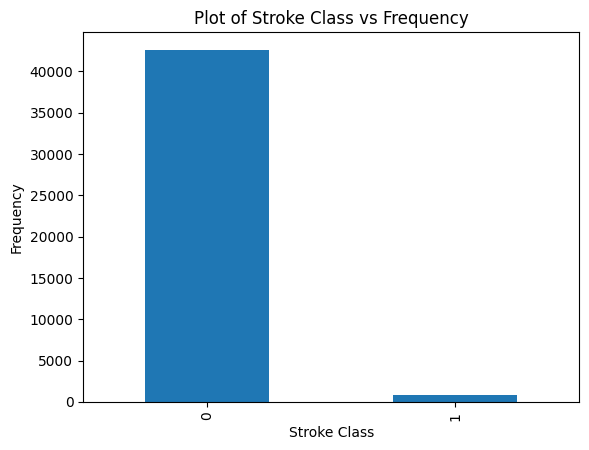

In [ ]:
label_count.plot(kind='bar',title='Plot of Stroke Class vs Frequency')
plt.xlabel('Stroke Class')
plt.ylabel('Frequency')

In [ ]:
print(dataset.isna().sum())

age                       0
hypertension              0
heart_disease             0
metric_1                  0
metric_2               1462
metric_3                  0
metric_4                  0
metric_5                  0
stroke                    0
Female                    0
Male                      0
married_status_Yes        0
occupation_B              0
occupation_C              0
occupation_D              0
occupation_E              0
residence_Urban           0
smoking_status        13292
dtype: int64


In [ ]:
# Droping rows having null values reduces the strokes by around 20%. Due to less data it would be better to drop the columns rather that null-value rows
# dataset.dropna(axis=0, how='all', subset=['metric_2'], inplace=True)
# dataset.dropna(axis=0, how='all', subset=['smoking_status'], inplace=True)

dataset.pop('metric_2')
dataset.pop('smoking_status')

print(dataset.head())

    age hypertension heart_disease  metric_1 metric_3  metric_4  metric_5  \
0   3.0            0             0     95.12        1     99.35     95.12   
1  58.0            1             0     87.96        1     99.70     87.96   
2   8.0            0             0    110.89        0     96.35    110.89   
3  70.0            0             0     69.04        0     95.52     69.04   
4  14.0            0             0    161.28        1     95.10    161.28   

  stroke Female Male married_status_Yes occupation_B occupation_C  \
0      0      0    1                  0            0            0   
1      0      0    1                  1            1            0   
2      0      1    0                  0            1            0   
3      0      1    0                  1            1            0   
4      0      0    1                  0            0            1   

  occupation_D occupation_E residence_Urban  
0            0            0               0  
1            0            0   

In [ ]:
# Droping redundant columns which should not affect the chances of stroke
dataset = dataset.drop(['married_status_Yes', 'occupation_B', 'occupation_C', 'occupation_D', 'occupation_E'], axis=1)

In [ ]:
# standardize the numeric data (not the binary data)
from sklearn.preprocessing import StandardScaler

# get the numeric columns
numeric_columns = dataset.select_dtypes(exclude=['object']).columns
print('non-binary numeric columns - {}'.format(numeric_columns))

for col in numeric_columns:
  temp = dataset[col]
  temp = temp.values.reshape(-1,1) # convert column into numpy array for stnadardization
  dataset['norm_'+col] = StandardScaler().fit_transform(temp) # standarzize
  dataset = dataset.drop([col],axis=1) # drop original column

print(dataset.head())

non-binary numeric columns - Index(['age', 'metric_1', 'metric_4', 'metric_5'], dtype='object')
  hypertension heart_disease metric_3 stroke Female Male residence_Urban  \
0            0             0        1      0      0    1               0   
1            1             0        1      0      0    1               1   
2            0             0        0      0      1    0               1   
3            0             0        0      0      1    0               0   
4            0             0        1      0      0    1               0   

   norm_age  norm_metric_1  norm_metric_4  norm_metric_5  
0 -1.675064      -0.217176       1.243037      -0.217176  
1  0.671489      -0.383258       1.481670      -0.383258  
2 -1.461741       0.148621      -0.802390       0.148621  
3  1.183464      -0.822123      -1.368292      -0.822123  
4 -1.205753       1.317458      -1.654652       1.317458  


In [ ]:
dataset['stroke'] = dataset['stroke'].astype('int')
dataset.dtypes

hypertension        object
heart_disease       object
metric_3            object
stroke               int64
Female              object
Male                object
residence_Urban     object
norm_age           float64
norm_metric_1      float64
norm_metric_4      float64
norm_metric_5      float64
dtype: object

In [ ]:
# function for splitting the dataset. Stratify stroke column to ensure positive strokes in test data
from sklearn.model_selection import train_test_split
def splittingData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=dataset[['stroke']], random_state=42)
    return X_train,X_test,y_train,y_test

In [ ]:
# split the dataset
X = dataset.drop('stroke', axis=1).values
y = dataset['stroke'].values

X_train, X_test, y_train, y_test = splittingData(X, y)

Text(0, 0.5, 'Frequency\n')

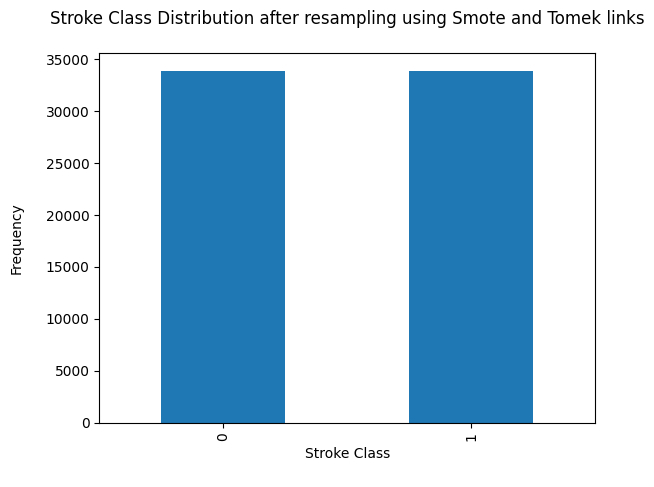

In [ ]:
# Resample only the training dataset and not the test dataset
# oversampling and undersampling using smote and Tomek links
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_train, y_train = smt.fit_resample(X_train, y_train)

df = pd.DataFrame(y_train, columns=['stroke'])
df.stroke.value_counts().plot(kind='bar',title='Stroke Class Distribution after resampling using Smote and Tomek links\n')
plt.xlabel('Stroke Class\n')
plt.ylabel('Frequency\n')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

In [ ]:
# create a function to fit a given model and print its classification report
def training_prediction(model_name, model, X_train_set, y_train_set, X_test_set, y_test_set):
    model.fit(X_train_set, y_train_set) # fit the given model
    y_pred = model.predict(X_test_set)
    print("Recall Score : ",recall_score(y_test_set, y_pred, average='macro'))
    print("Classification Report for {0} is as follows".format(model_name))
    print(classification_report(y_test_set, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No Stroke', 'Stroke'])
    cm_display.plot()
    plt.show()

Recall Score :  0.7720353543166449
Classification Report for Logistic Regression - SMOTE Token Links
 is as follows
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8523
           1       0.05      0.80      0.10       157

    accuracy                           0.74      8680
   macro avg       0.52      0.77      0.48      8680
weighted avg       0.98      0.74      0.84      8680



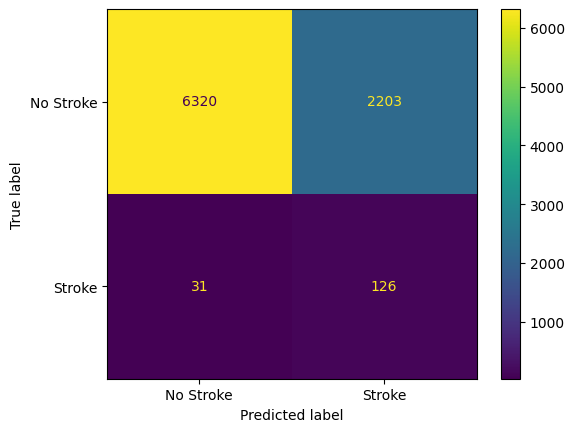

In [ ]:
# selecting logistic regression as a generalized linear classifier for binary classification
logisticRegressionModel = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=10)
training_prediction('Logistic Regression - SMOTE Token Links\n', logisticRegressionModel, X_train, y_train, X_test, y_test)


Recall Score :  0.7612828831090994
Classification Report for Random Forest - SMOTE Token Links 
 is as follows
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8523
           1       0.05      0.80      0.10       157

    accuracy                           0.73      8680
   macro avg       0.52      0.76      0.47      8680
weighted avg       0.98      0.73      0.83      8680



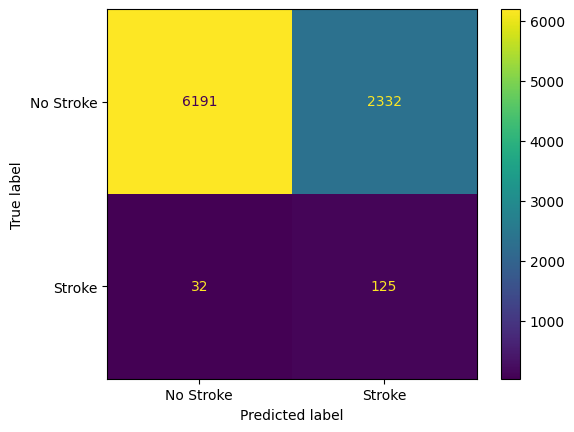

In [ ]:
# selecting random forest as a classifier

X_train, X_test, y_train, y_test = splittingData(X, y)
rfModel = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, criterion='gini', class_weight='balanced')
training_prediction('Random Forest - SMOTE Token Links \n', rfModel, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

          -1       0.09      0.10      0.10       157
           1       0.98      0.98      0.98      8523

    accuracy                           0.97      8680
   macro avg       0.54      0.54      0.54      8680
weighted avg       0.97      0.97      0.97      8680



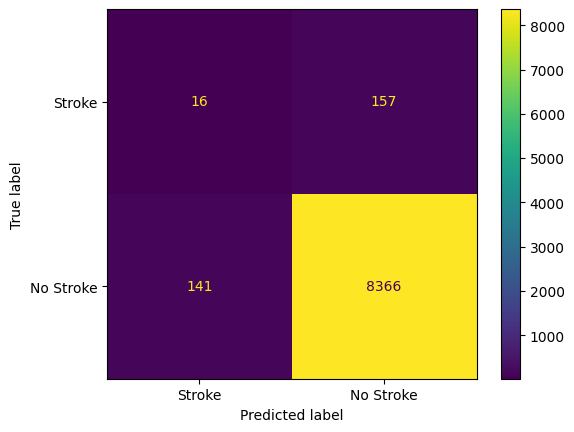

In [ ]:
# Isolation forest does not require training data to be resampled

# split the dataset
X = dataset.drop('stroke', axis=1).values
y = dataset['stroke'].values

X_train, X_test, y_train, y_test = splittingData(X, y)

# calculate ratio of majority over minority class
count_class_0 = (y_train == 0).sum()
count_class_1 = (y_train == 1).sum()
ratio = count_class_0/count_class_1

# print(ratio)

from sklearn.ensemble import IsolationForest
if_model = IsolationForest(n_estimators=100, contamination=1/ratio+0.00015)

mod_X_Train = X_train[y_train==0]
if_model.fit(mod_X_Train)
# detect outliers in the test set
yhat = if_model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Stroke', 'No Stroke'])
cm_display.plot()
plt.show()